In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 59.2 MB/s eta 0:00:06tcmalloc: large alloc 1147494400 bytes == 0x557e639de000 @  0x7f27550fc615 0x557e2a8c54cc 0x557e2a9a547a 0x557e2a8c82ed 0x557e2a9b9e1d 0x557e2a93be99 0x557e2a9369ee 0x557e2a8c9bda 0x557e2a93bd00 0x557e2a9369ee 0x557e2a8c9bda 0x557e2a938737 0x557e2a9bac66 0x557e2a937daf 0x557e2a9bac66 0x557e2a937daf 0x557e2a9bac66 0x557e2a937daf 0x557e2a8ca039 0x557e2a90d409 0x557e2a8c8c52 0x557e2a93bc25 0x557e2a9369ee 0x557e2a8c9bda 0x557e2a938737 0x557e2a9369ee 0x557e2a8c9bda 0x557e2a937915 0x557e2a8c9afa 0x557e2a937c0d 0x557e2a9369ee
     |█████████████████████████████▏  | 1055.7 MB 1.4 MB/s eta 0:01:13tcmalloc: large alloc 1434370048 bytes == 0x557ea8034000 @  0x7f27550fc615 0x557e2a8c54cc 0x557e2a9a547a 0x557e2a8c82ed 0x557e2a9b9e1d 0x557e2a93be99 0x557e2a9369ee 0x557e2a8c9bda 0x557e2a93bd00 0x557e2a9369ee 0x557e2a8c9bda 0x557e2a938737 0x557e2a9bac66 0x557e2a937

In [3]:
import torch
torch.__version__

'1.7.1+cu110'

In [4]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 189 kB 8.0 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 


In [5]:
import fastai
fastai.__version__

'2.5.3'

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *
import numpy as np
import fastai
import matplotlib.pyplot as plt

In [7]:
path = Path("/content/drive/MyDrive/flowers")
path.ls()

(#5) [Path('/content/drive/MyDrive/flowers/tulip'),Path('/content/drive/MyDrive/flowers/daisy'),Path('/content/drive/MyDrive/flowers/sunflower'),Path('/content/drive/MyDrive/flowers/dandelion'),Path('/content/drive/MyDrive/flowers/rose')]

In [8]:
np.random.seed(42)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(512, min_scale=0.75),
                                    bs=32,batch_tfms=[*aug_transforms(size=256, max_warp=0), Normalize.from_stats(*imagenet_stats)],num_workers=0)

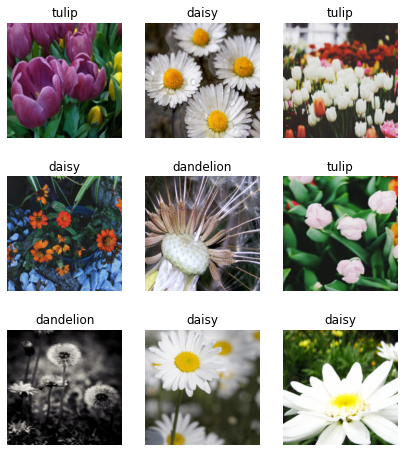

In [9]:
data.show_batch(nrows=3, figsize=(7,8))

In [10]:
learn = cnn_learner(data, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [17]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.812927,0.489272,0.175520,1:01:14


In [18]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(1, lr_max=slice(1e-5,1e-4)) 

epoch,train_loss,valid_loss,error_rate,time
0,0.488744,0.392952,0.145497,1:01:24


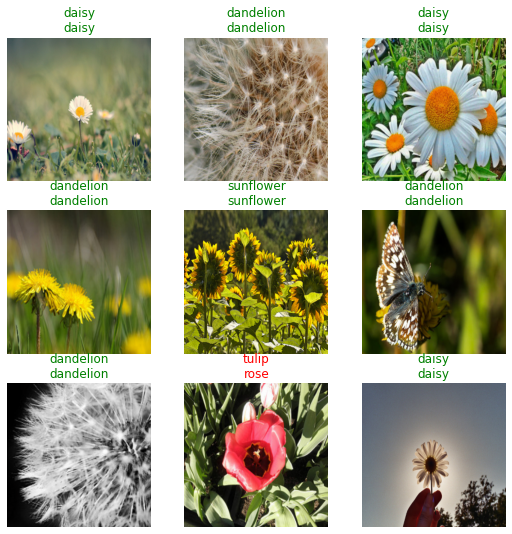

In [22]:
learn.show_results()